# Exploratory Data Analysis
Visualizing bands within different tar files.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import os

if Path(os.getcwd()).stem == "notebooks":
    os.chdir("..")
    
from dataset import get_webdataset, make_webdataset_args, BANDS_GROUPS_IDX, BANDS


In [2]:
def plot_bands_over_time(eo_data_list, title, color):
    """Plot all bands over time"""
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

    for eo_data in eo_data_list:
        row_idx = 0
        for band_group, band_indexes in BANDS_GROUPS_IDX.items():
            if row_idx > 4:
                row_idx = 4
            else:
                col_idx = 0
            for b in band_indexes:
                ax = axes[row_idx, col_idx]
                line = ax.plot(eo_data[:, b], color=color, linewidth=1, alpha=0.2)
                ax.set_title(BANDS[b])
                ax.set_ylabel(band_group)
                col_idx += 1
            row_idx += 1

    plt.suptitle(title, size=24)
    fig.subplots_adjust(top=0.2)
    fig.tight_layout()
    return fig

def plot_dataset(url, color, sample_rate):
    dataset = get_webdataset(
        url=f"pipe:gsutil cat {url}",
        shuffle=True,
        memory_cache=False,
        skip_normalization=True,
        cache_dir=f"data/tars/{Path(url).stem}",
        **make_webdataset_args(url),
    )

    eo_data_list = []
    i = 0
    for item in dataset:
        if i % sample_rate == 0:
            eo_data_list.append(item)
        i += 1
        
    title = Path(url).stem
    plot_bands_over_time(eo_data_list, color=color, title=title)
    

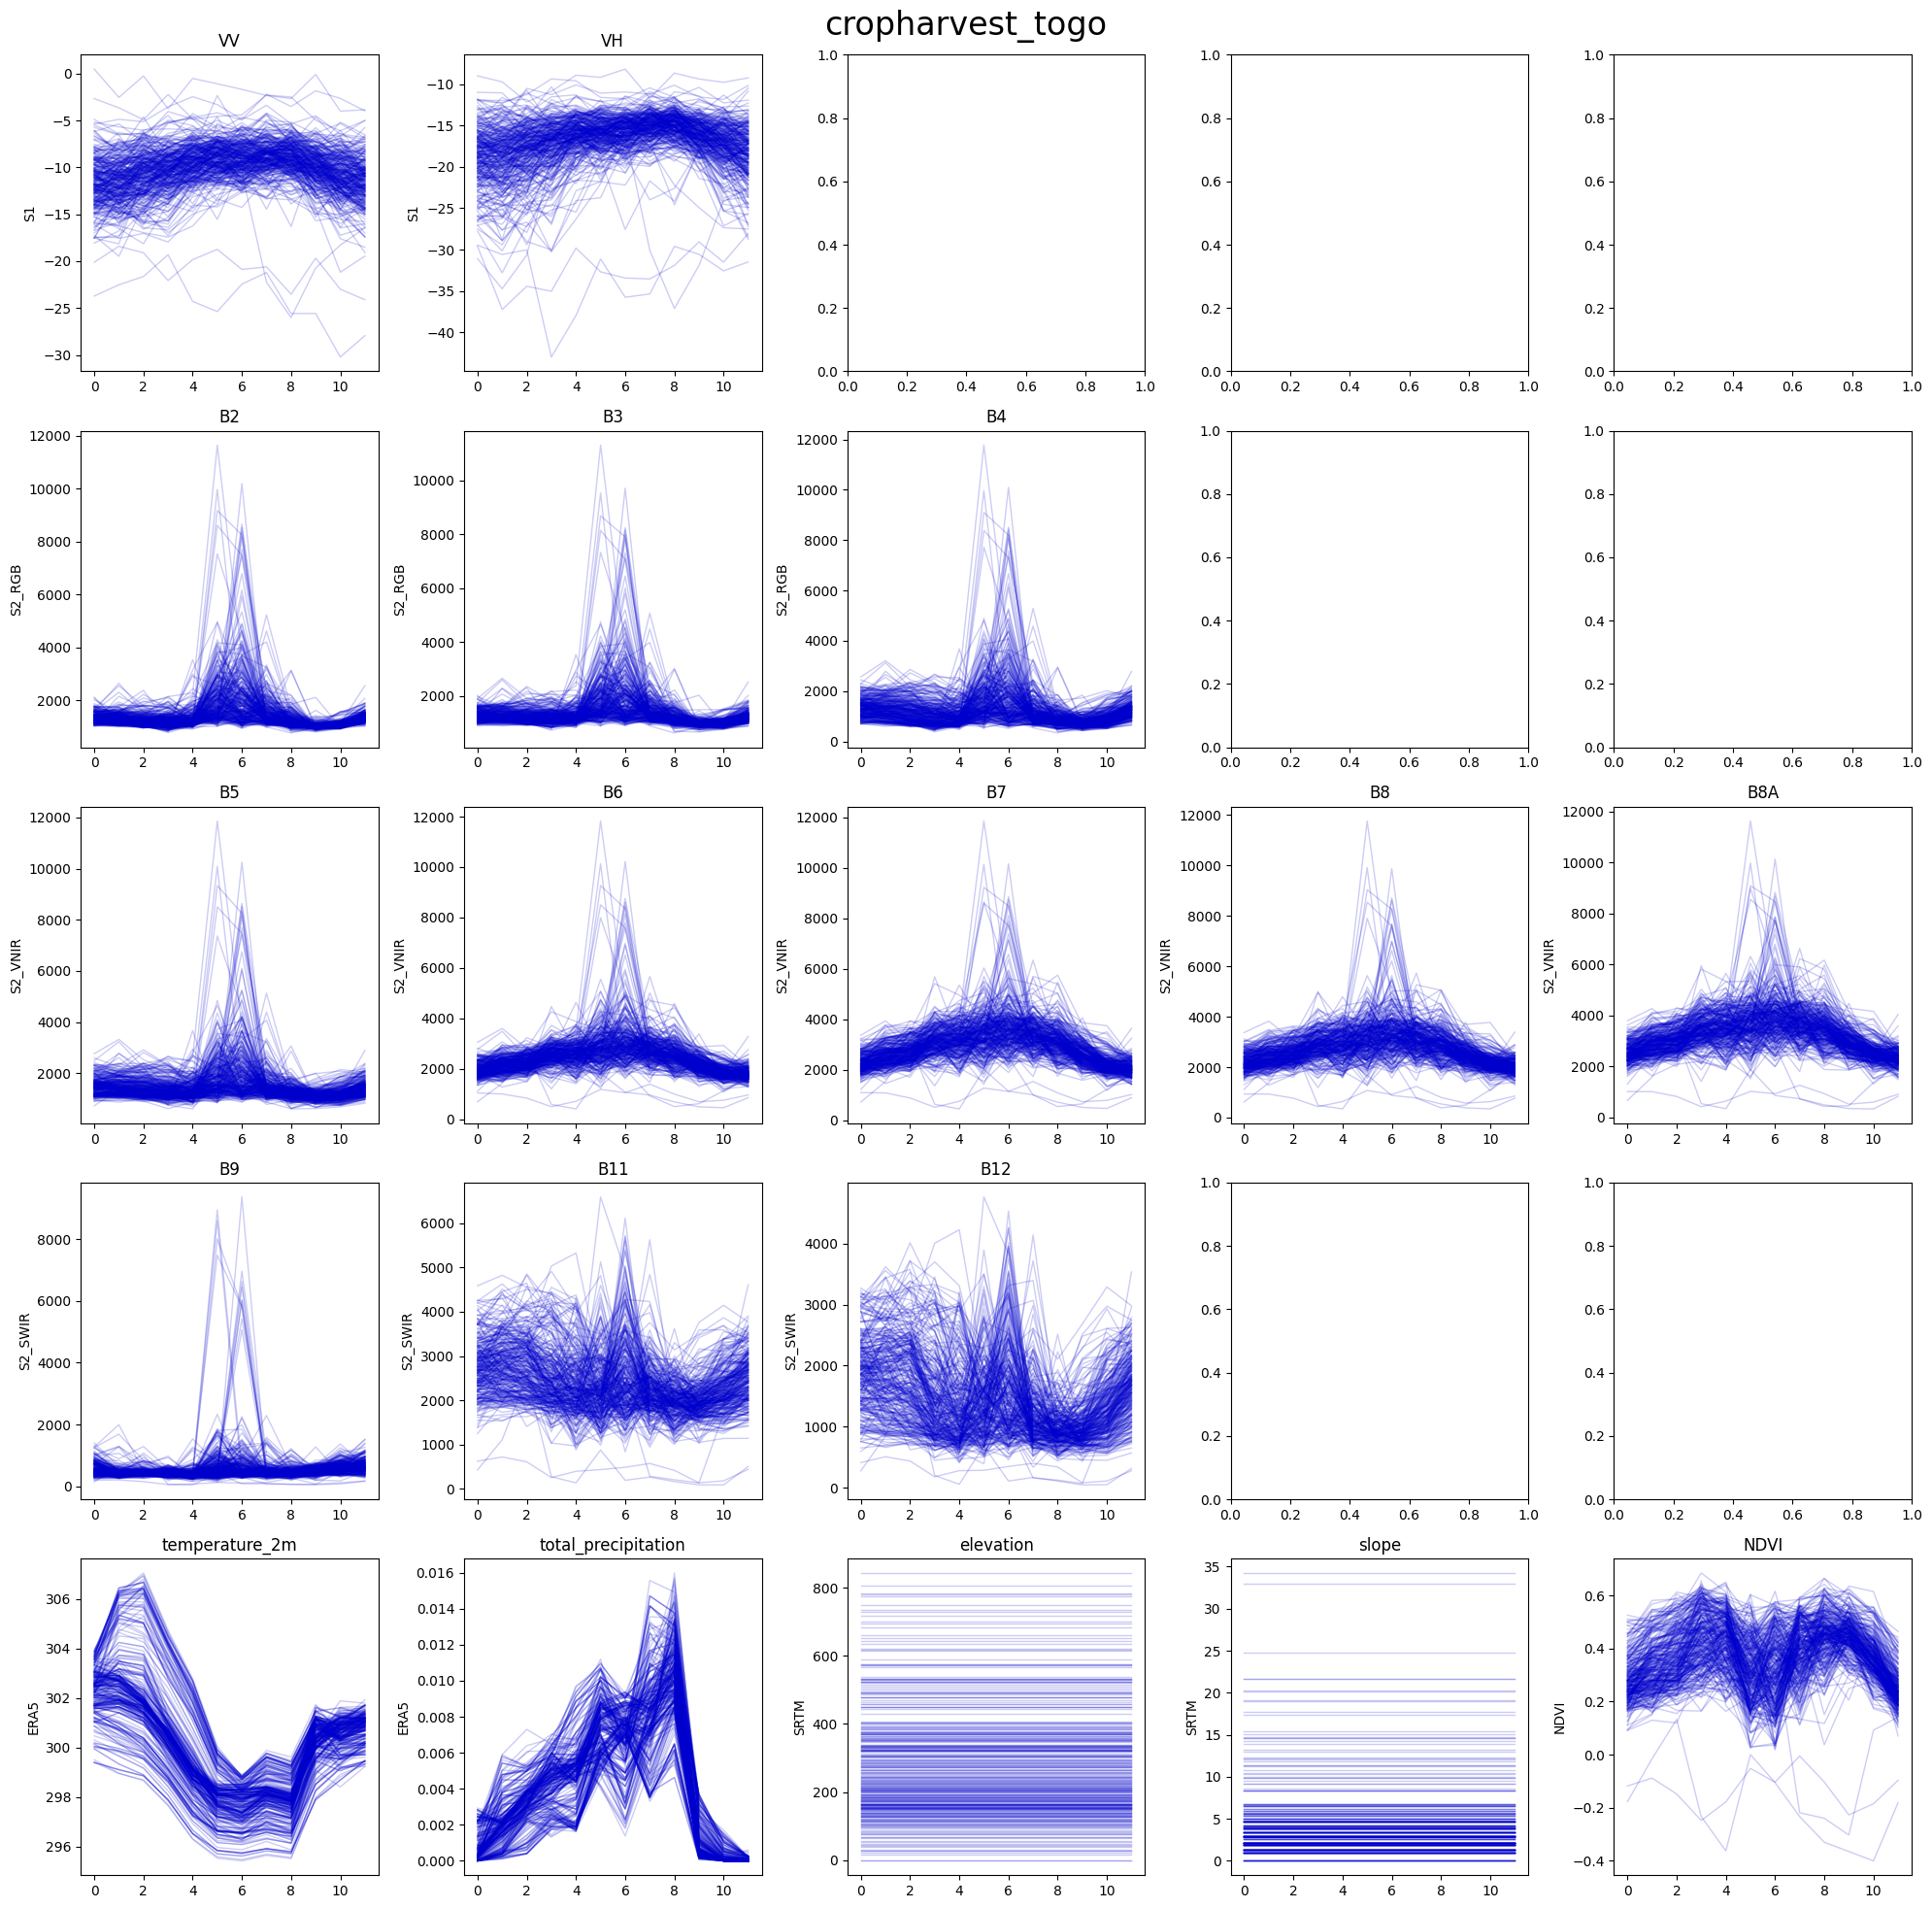

In [5]:
plot_dataset("gs://lem-assets2/tars/cropharvest_togo.tar", color="mediumblue", sample_rate=1)

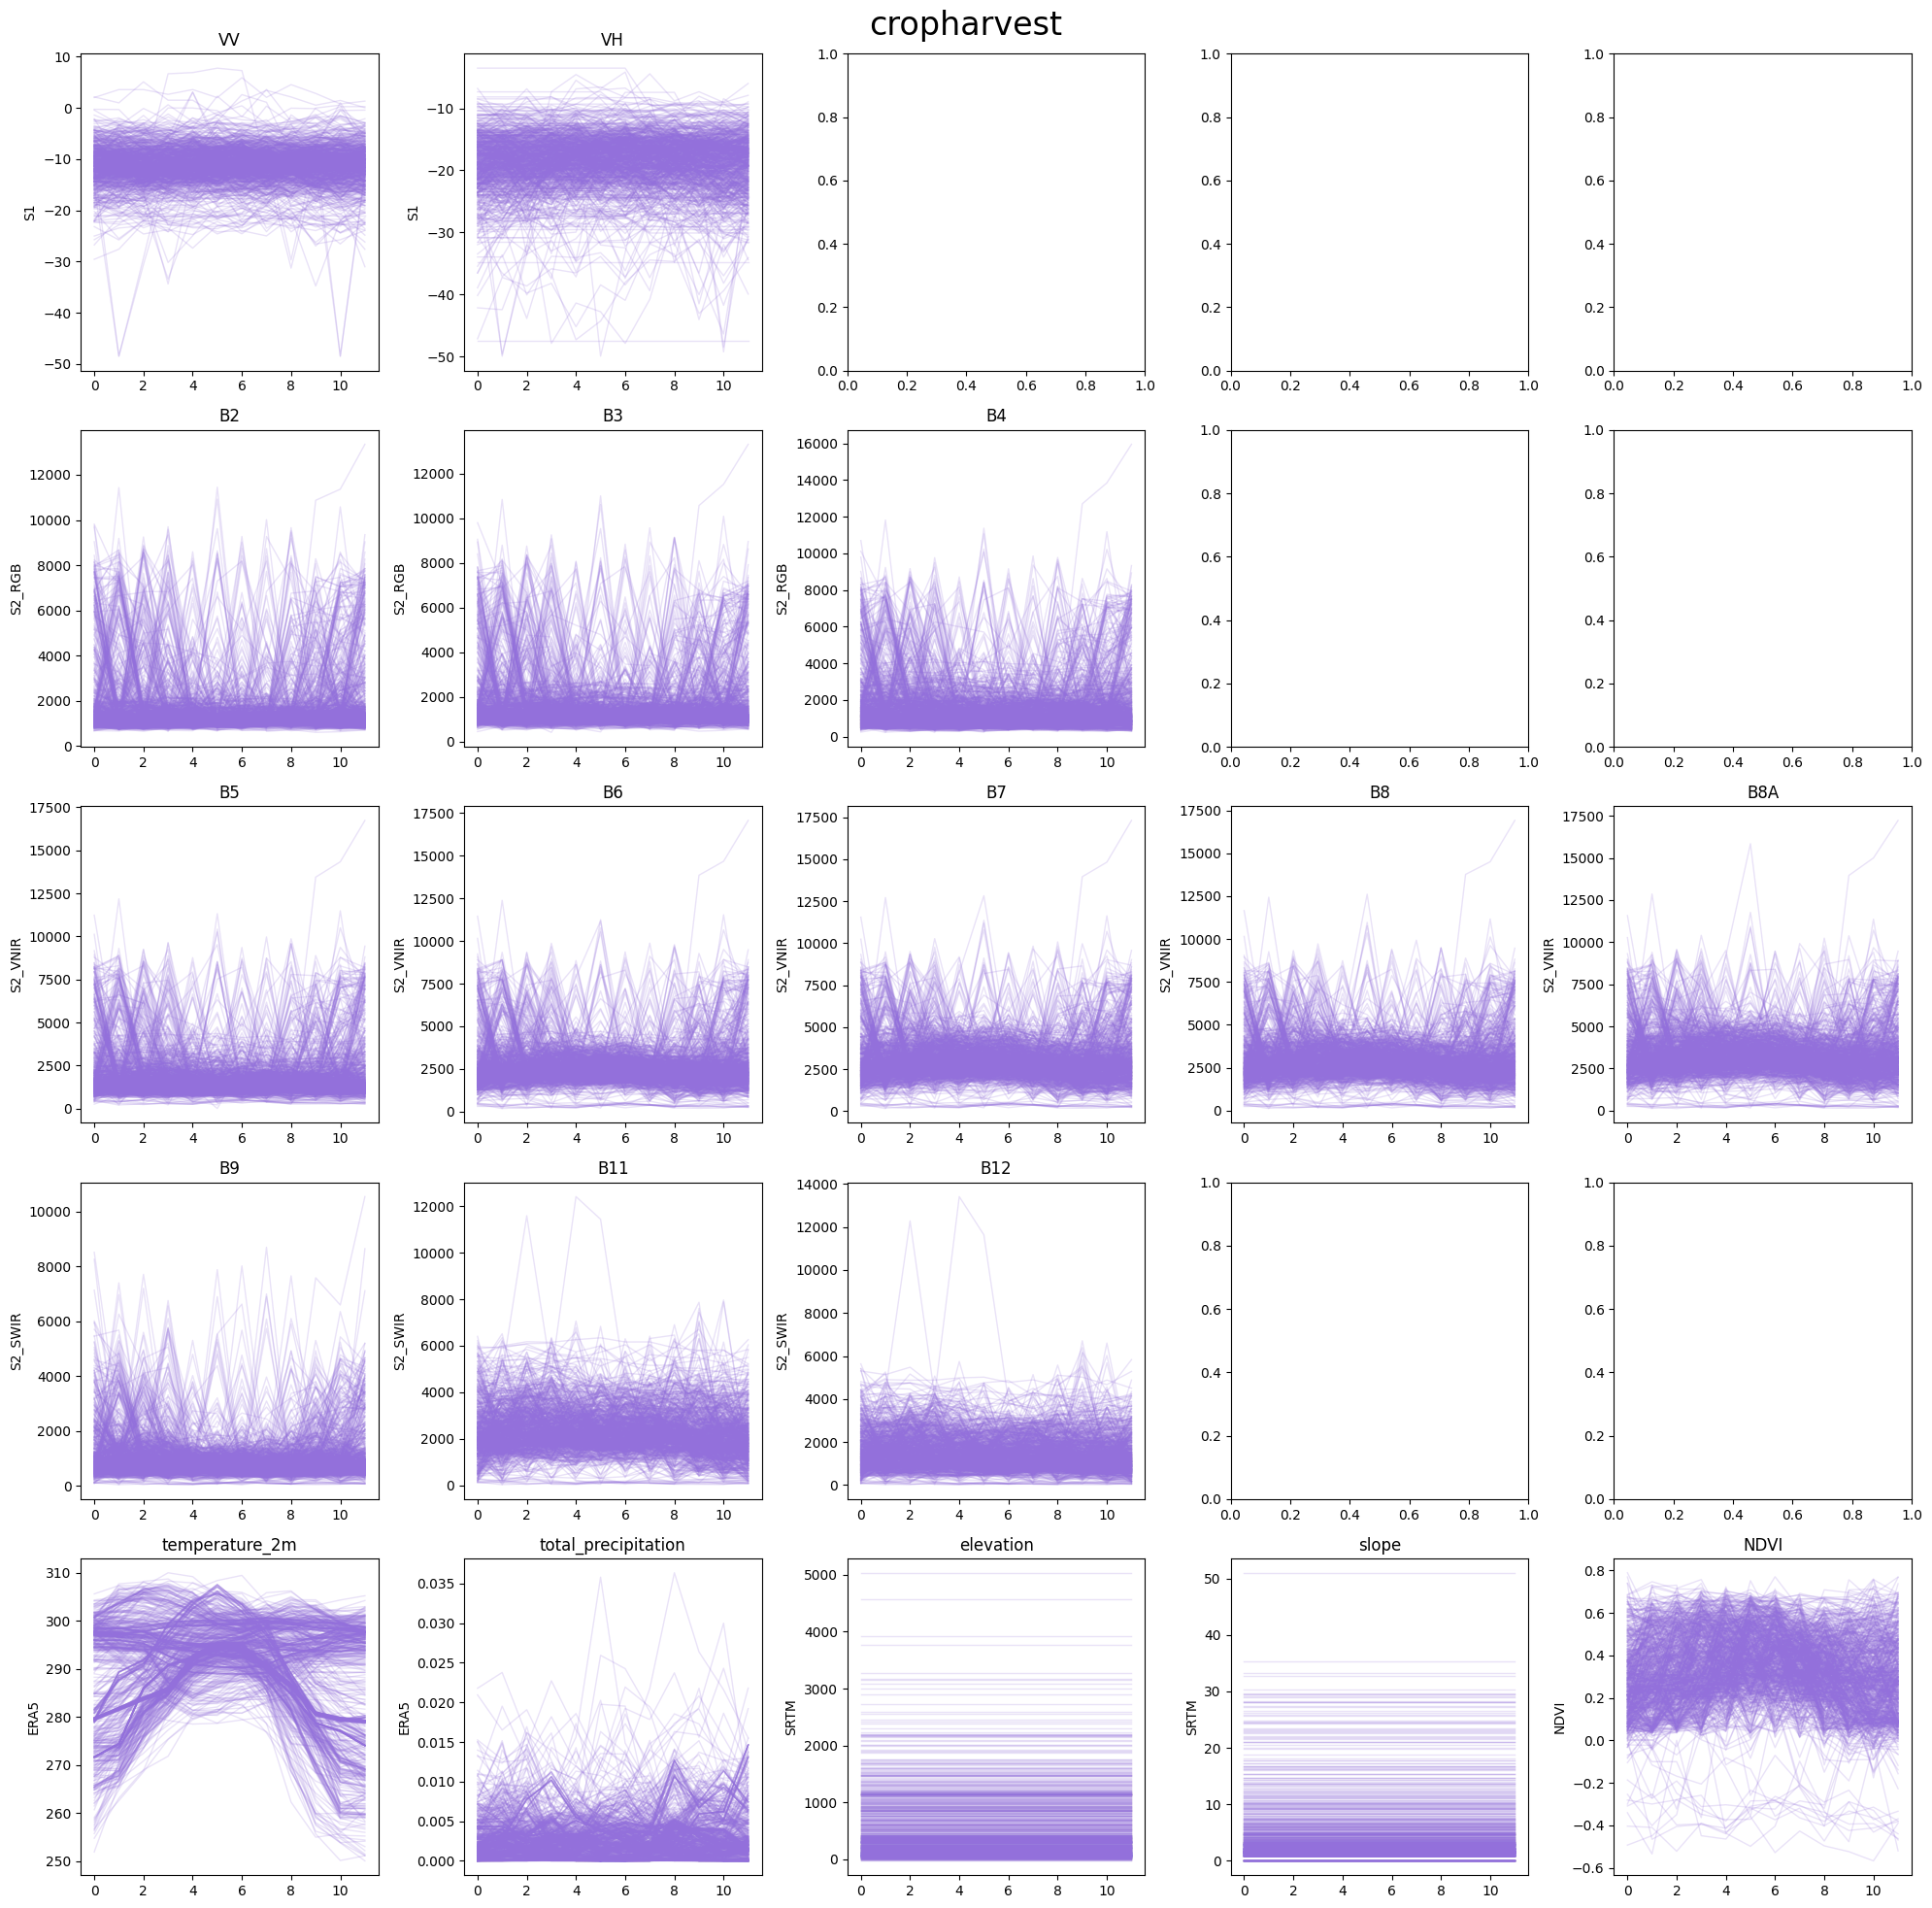

In [8]:
plot_dataset("gs://lem-assets2/tars/cropharvest.tar", color="mediumpurple", sample_rate=100)

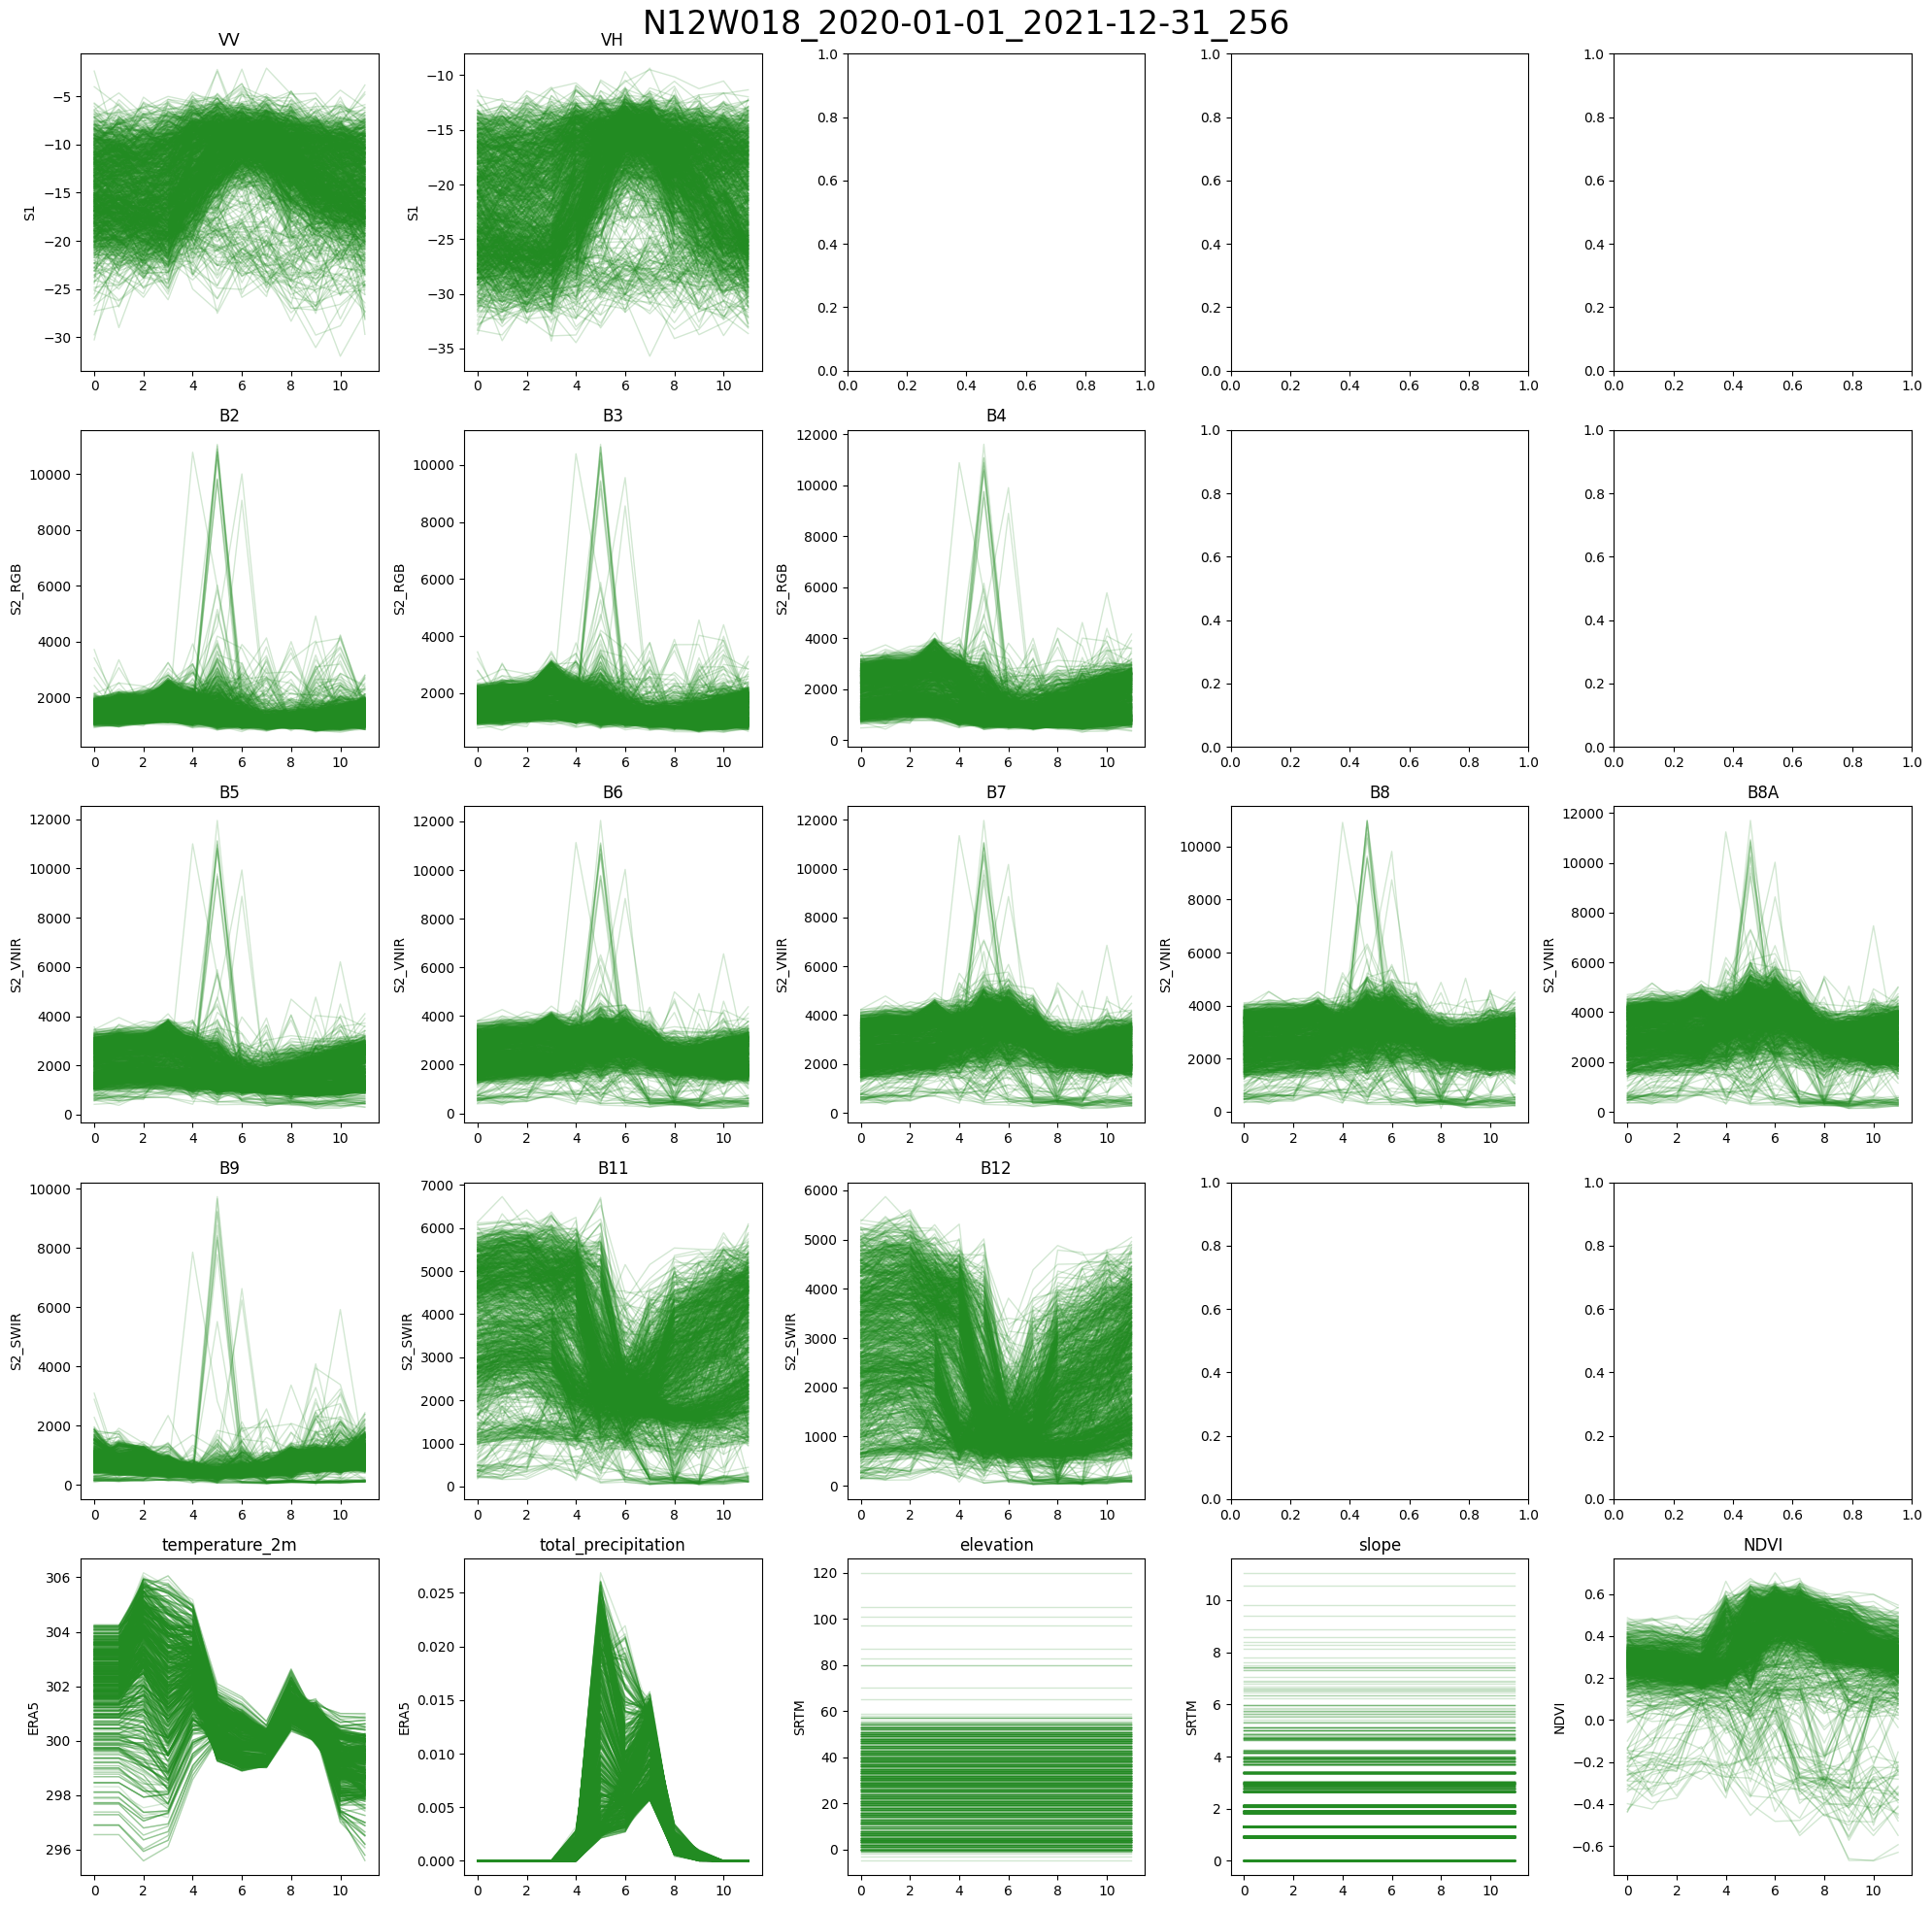

In [10]:
plot_dataset("gs://lem-assets2/tars/N12W018_2020-01-01_2021-12-31_256.tar", color="forestgreen", sample_rate=1000)

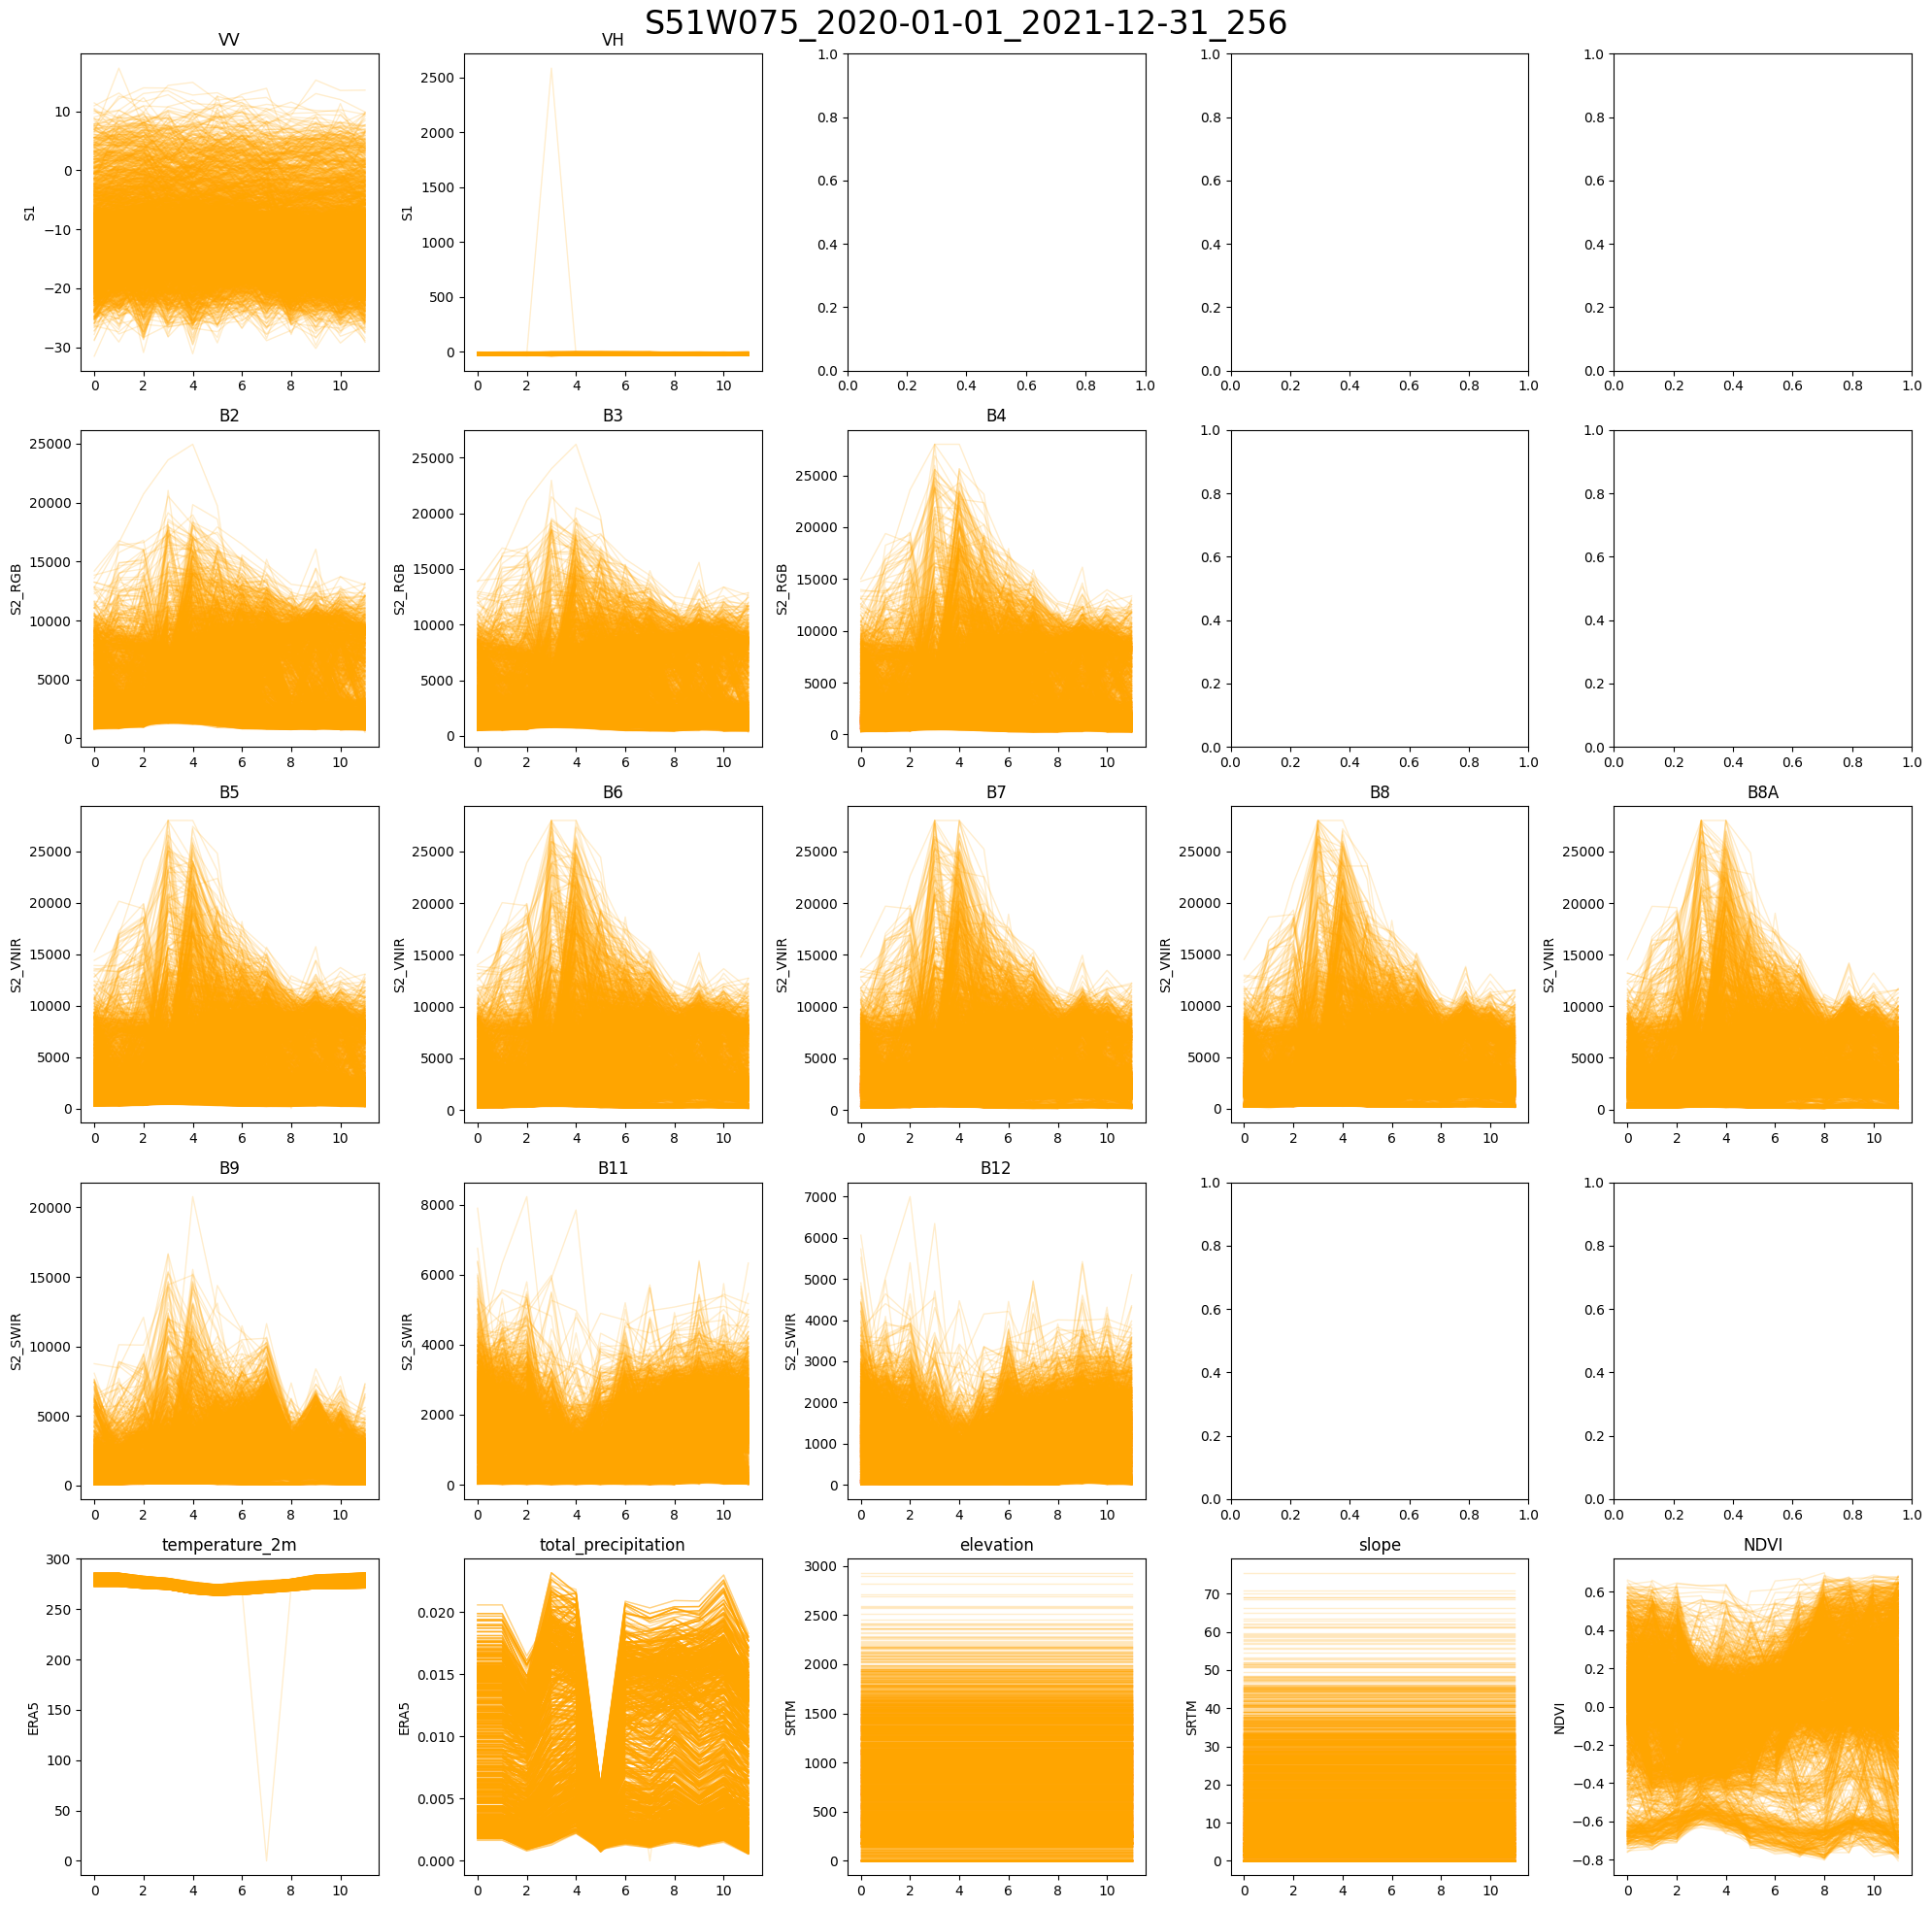

In [12]:
plot_dataset("gs://lem-assets2/tars/S51W075_2020-01-01_2021-12-31_256.tar", color="orange", sample_rate=1000)